# WebScraping

### Install beautifulsoup

In [1]:
%pip install beautifulsoup4

### Restart kernel and run all cells

In [2]:
import requests
url = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=e45f70dd-cbc3-4d01-9442-ed7d1a87c355"
response = requests.get(url)
response

<Response [500]>

In [3]:
response.content

b'<html><body><h1>500 Internal Server Error</h1>\nAn internal server error occurred.\n</body></html>\n'

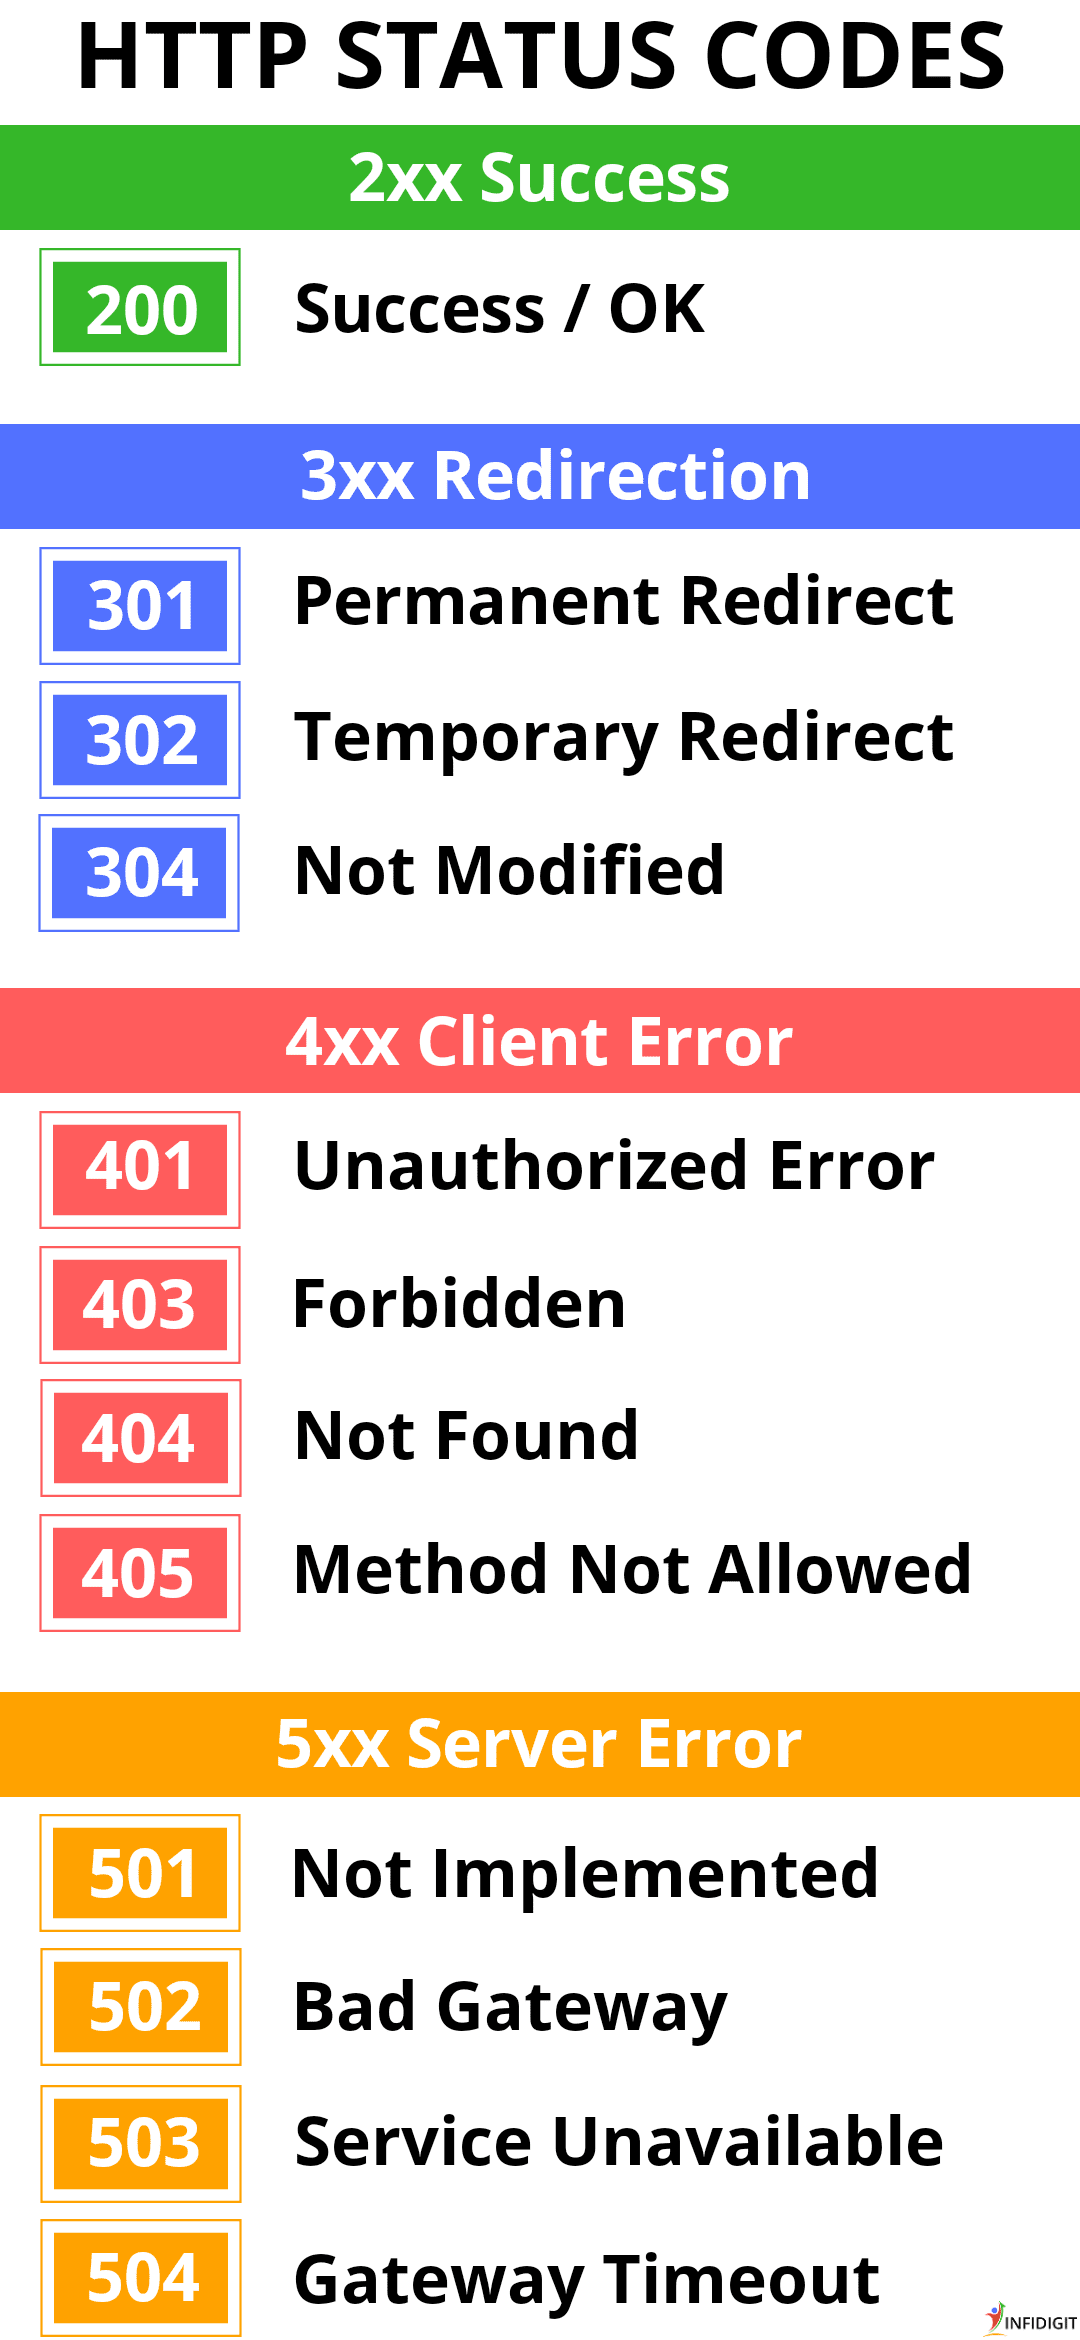

### Websraping OPIndia website

In [4]:
url = "https://www.opindia.com/latest-news/?nocache"
response = requests.get(url)
response

<Response [200]>

### You will be allowed to scrape only when response code is 200

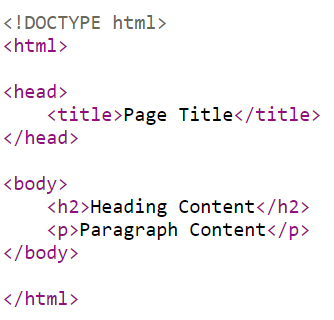

<!DOCTYPE html>
<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arch
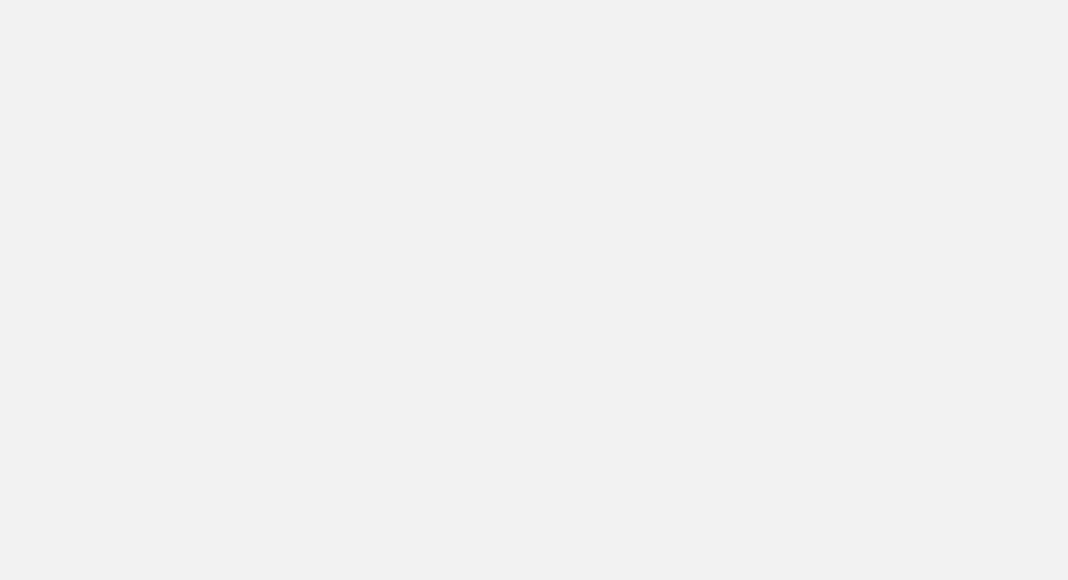

In [6]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(response.content)
bs

In [10]:
headings = bs.find_all('h3', class_="entry-title td-module-title")
headings[0:5]

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/jharkhand-girl-students-cm-hemant-soren-program/" rel="bookmark" title="‘Got money for bicycles?’ asks Jharkhand CM Hemant Soren, girl students answer ‘No’, leaving the CM embarrassed at a public event">‘Got money for bicycles?’ asks Jharkhand CM Hemant Soren, girl students answer ‘No’, leaving the CM embarrassed at a public event</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/congress-distances-itself-from-its-mp-dheeraj-sahu-after-i-t-raids-unearthed-around-300-crores/" rel="bookmark" title="Congress distances itself from its MP Dheeraj Sahu after I-T raids unearthed around ₹300 crores from premises linked to him, says only he can explain">Congress distances itself from its MP Dheeraj Sahu after I-T raids unearthed around ₹300 crores from premises linked to him, says only he can...</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindi

In [12]:
headings[0].text

'‘Got money for bicycles?’ asks Jharkhand CM Hemant Soren, girl students answer ‘No’, leaving the CM embarrassed at a public event'

In [15]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/12/jharkhand-girl-students-cm-hemant-soren-program/'

### Webscraping all headlines and urls

In [16]:
def get_headings_and_links(url):
    import requests
    response = requests.get(url)
    from bs4 import BeautifulSoup
    bs = BeautifulSoup(response.content)
    headings = bs.find_all('h3', class_="entry-title td-module-title")
    headline = []
    links = []
    for i in headings:
        h = i.text
        headline.append(h)
        l = i.find('a').get('href')
        links.append(l)
    return headline, links

In [17]:
url

'https://www.opindia.com/latest-news/?nocache'

In [18]:
headlines, links = get_headings_and_links(url)

In [20]:
headlines[0:5]

['BSP Supremo Mayawati names her nephew, Akash Anand, as her political heir',
 '‘Got money for bicycles?’ asks Jharkhand CM Hemant Soren, girl students answer ‘No’, leaving the CM embarrassed at a public event',
 'Congress distances itself from its MP Dheeraj Sahu after I-T raids unearthed around ₹300 crores from premises linked to him, says only he can...',
 'Congress MP Karti Chidambaram mocks report of Tata Group setting up semiconductor plant in Assam, gets befitting replies from BJP leaders and others',
 '‘Jamiat gave you wrong information’: Congress leader Debabrata Saikia demands apology from Kapil Sibal for claiming that Assam was part of Myanmar']

In [22]:
links[0:5]

['https://www.opindia.com/2023/12/bsp-supremo-mayawati-names-her-nephew-akash-anand-as-her-political-heir/',
 'https://www.opindia.com/2023/12/jharkhand-girl-students-cm-hemant-soren-program/',
 'https://www.opindia.com/2023/12/congress-distances-itself-from-its-mp-dheeraj-sahu-after-i-t-raids-unearthed-around-300-crores/',
 'https://www.opindia.com/2023/12/karti-chidambaram-mocks-tata-groups-plan-for-a-semiconductor-plant-in-assam-receives-backlash/',
 'https://www.opindia.com/2023/12/congress-leader-debabrata-saikia-asks-kapil-sibal-to-apologise-for-claiming-that-assam-was-part-of-myanmar/']

### Fetching news date and article

In [23]:
links[0]

'https://www.opindia.com/2023/12/bsp-supremo-mayawati-names-her-nephew-akash-anand-as-her-political-heir/'

In [24]:
response2 = requests.get(links[0])
response2

<Response [200]>

<!DOCTYPE html>
<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>BSP Supremo Mayawati names her nephew, Akash Anand, as her political heir</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="BSP Supremo announced her nephew as her heir in a party meeting held in Lucknow. Akash Anand is the son of Mayawati's younger brother Anand Kumar. | OpIndia News" name="description"/>
<link href="https://www.opindia.com/2023/12/bsp-supremo-mayawati-names-her-nephew-akash-anand-as-her-political-heir/" rel="canonical"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="BSP Supremo Mayawati names her nephew, 
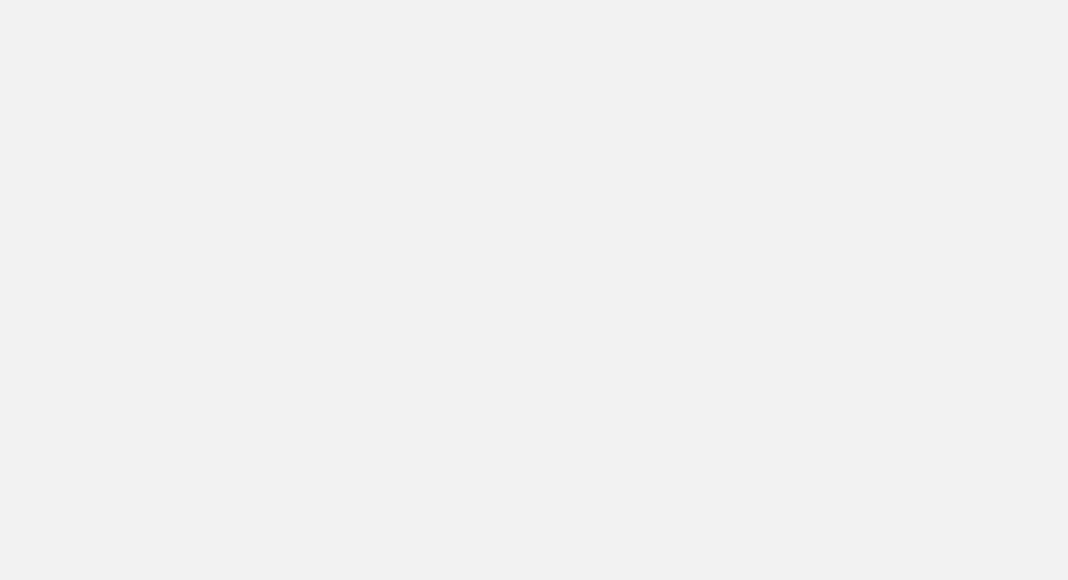

In [25]:
bs2 = BeautifulSoup(response2.content)
bs2

In [27]:
date = bs2.find('time', class_="entry-date updated td-module-date")
date.text

'10 December, 2023 '

In [28]:
para = bs2.find_all('p')
para[0:5]

[<p>On 10th December (Sunday), Bahujan Samaj Party (BSP) supremo and former Chief Minister of Uttar Pradesh Mayawati named 28-year-old nephew Akash Anand as her successor. The announcement was made at the party meeting held in Lucknow on Sunday. The meeting was presided over by Mayawati, and she was accompanied by her nephew Akash Anand. It was called to plan the party’s preparations for the upcoming Lok Sabha 2024 polls. </p>,
 <p>Speaking with ANI about the party meeting, BSP leader Udayveer Singh said, “BSP chief Mayawati has announced Akash Anand as her successor.”</p>,
 <p dir="ltr" lang="en"><a href="https://twitter.com/hashtag/WATCH?src=hash&amp;ref_src=twsrc%5Etfw">#WATCH</a> | Lucknow, Uttar Pradesh | Bahujan Samaj Party (BSP) leader Udayveer Singh says, "BSP chief Mayawati has announced Akash Anand (Mayawati's nephew) as her successor…" <a href="https://t.co/nT1jmAMI29">pic.twitter.com/nT1jmAMI29</a></p>,
 <p>Reacting to the development, BSP UP president <a href="https://twit

In [30]:
para[0].text

'On 10th December (Sunday), Bahujan Samaj Party (BSP) supremo and former Chief Minister of Uttar Pradesh Mayawati named 28-year-old nephew Akash Anand as her successor. The announcement was made at the party meeting held in Lucknow on Sunday. The meeting was presided over by Mayawati, and she was accompanied by her nephew Akash Anand. It was called to plan the party’s preparations for the upcoming Lok Sabha 2024 polls.\xa0'

In [31]:
news = ""
for i in para:
    news = news + i.text

In [32]:
print(news)

On 10th December (Sunday), Bahujan Samaj Party (BSP) supremo and former Chief Minister of Uttar Pradesh Mayawati named 28-year-old nephew Akash Anand as her successor. The announcement was made at the party meeting held in Lucknow on Sunday. The meeting was presided over by Mayawati, and she was accompanied by her nephew Akash Anand. It was called to plan the party’s preparations for the upcoming Lok Sabha 2024 polls. Speaking with ANI about the party meeting, BSP leader Udayveer Singh said, “BSP chief Mayawati has announced Akash Anand as her successor.”#WATCH | Lucknow, Uttar Pradesh | Bahujan Samaj Party (BSP) leader Udayveer Singh says, "BSP chief Mayawati has announced Akash Anand (Mayawati's nephew) as her successor…" pic.twitter.com/nT1jmAMI29Reacting to the development, BSP UP president Vishwnath Pal said, “The whole ‘Bahujan Samaj’ is happy.”VIDEO | "The whole 'Bahujan Samaj' is happy," says BSP UP president @PalVishwnathbsp in response to a media query on Mayawati declaring h

### Write a function to fetch news dates and articles for procvided links

In [36]:
def get_news_date_and_article(links):
    import requests
    from bs4 import BeautifulSoup
    dates = []
    news = []
    for i in links:
        response2 = requests.get(i)
        bs2 = BeautifulSoup(response2.content)
        d = bs2.find('time', class_="entry-date updated td-module-date")
        dates.append(d.text)
        para = bs2.find_all('p')
        n = ""
        for j in para:
            n = n + j.text
        news.append(n) 
    return dates, news

In [37]:
links[0:5]

['https://www.opindia.com/2023/12/bsp-supremo-mayawati-names-her-nephew-akash-anand-as-her-political-heir/',
 'https://www.opindia.com/2023/12/jharkhand-girl-students-cm-hemant-soren-program/',
 'https://www.opindia.com/2023/12/congress-distances-itself-from-its-mp-dheeraj-sahu-after-i-t-raids-unearthed-around-300-crores/',
 'https://www.opindia.com/2023/12/karti-chidambaram-mocks-tata-groups-plan-for-a-semiconductor-plant-in-assam-receives-backlash/',
 'https://www.opindia.com/2023/12/congress-leader-debabrata-saikia-asks-kapil-sibal-to-apologise-for-claiming-that-assam-was-part-of-myanmar/']

In [38]:
dates, news = get_news_date_and_article(links)

In [40]:
dates[0:5]

['10 December, 2023 ',
 '10 December, 2023 ',
 '9 December, 2023 ',
 '9 December, 2023 ',
 '9 December, 2023 ']

In [42]:
news[0]

'On 10th December (Sunday), Bahujan Samaj Party (BSP) supremo and former Chief Minister of Uttar Pradesh Mayawati named 28-year-old nephew Akash Anand as her successor. The announcement was made at the party meeting held in Lucknow on Sunday. The meeting was presided over by Mayawati, and she was accompanied by her nephew Akash Anand. It was called to plan the party’s preparations for the upcoming Lok Sabha 2024 polls.\xa0Speaking with ANI about the party meeting, BSP leader Udayveer Singh said, “BSP chief Mayawati has announced Akash Anand as her successor.”#WATCH | Lucknow, Uttar Pradesh | Bahujan Samaj Party (BSP) leader Udayveer Singh says, "BSP chief Mayawati has announced Akash Anand (Mayawati\'s nephew) as her successor…" pic.twitter.com/nT1jmAMI29Reacting to the development, BSP UP president Vishwnath Pal said, “The whole ‘Bahujan Samaj’ is happy.”VIDEO | "The whole \'Bahujan Samaj\' is happy," says BSP UP president @PalVishwnathbsp in response to a media query on Mayawati decl

In [43]:
len(links)

104

### Create dataframe for all the news articles

In [44]:
def get_news_dataframe(url):
    # Get headlines and links
    headlines, links = get_headings_and_links(url)
    # Get news dates and articles
    dates, news = get_news_date_and_article(links)
    # Create a dictionary to get dataframe
    dct = {'Date':dates,
           'Headline':headlines,
           'Link':links,
           'article':news}
    # Create the dataframe
    import pandas as pd
    df = pd.DataFrame(dct)
    return df
    

In [45]:
url

'https://www.opindia.com/latest-news/?nocache'

In [46]:
df_news = get_news_dataframe(url)

In [47]:
df_news

,Date,Headline,Link,article
0,"10 December, 2023","BSP Supremo Mayawati names her nephew, Akash A...",https://www.opindia.com/2023/12/bsp-supremo-ma...,"On 10th December (Sunday), Bahujan Samaj Party..."
1,"10 December, 2023",‘Got money for bicycles?’ asks Jharkhand CM He...,https://www.opindia.com/2023/12/jharkhand-girl...,Chief Minister Hemant Soren had arrived to par...
2,"9 December, 2023",Congress distances itself from its MP Dheeraj ...,https://www.opindia.com/2023/12/congress-dista...,Jairam Ramesh said that only the accused in th...
3,"9 December, 2023",Congress MP Karti Chidambaram mocks report of ...,https://www.opindia.com/2023/12/karti-chidamba...,"Karti Chidambaram had tweeted, ""Call me when t..."
4,"9 December, 2023",‘Jamiat gave you wrong information’: Congress ...,https://www.opindia.com/2023/12/congress-leade...,Debabrata Saikia wrote that the incorrect repr...
...,...,...,...,...
99,"9 December, 2023",“Ho gayi galti ab kya mar jaaun”: Aftab Poonwa...,https://www.opindia.com/2023/12/court-lockup-r...,The lockup room officials said that since the ...
100,"9 December, 2023","Shootout in posh Vasant Kunj area in Delhi, 2 ...",https://www.opindia.com/2023/12/delhi-lawrence...,"Two shooters were arrested in this shootout, o..."
101,"9 December, 2023",Madhya Pradesh: Javed Khan mercilessly beats h...,https://www.opindia.com/2023/12/muslim-woman-s...,A case was registered against the accused Jave...
102,"9 December, 2023",Maharashtra: Mohammad Adil Azamali Sheikh kill...,https://www.opindia.com/2023/12/navi-mumbai-mo...,The incident took place in New Mumbai's Sanpad...


In [48]:
df_news.to_csv('OpindiaNews.csv', index=False)

In [49]:
df_news.iloc[3, -1]

'Karti Chidambaram had tweeted, "Call me when the facility is actually operational," implying that that the proposed semiconductor plant by Tata Electronics will not come up in Assam.Bharatiya Janata Party (BJP) came together to slam Congress leader and Sivaganga Lok Sabha MP Karti Chidambaram for mocking the Tata Group’s plans to set up a semiconductor plant in Assam.\xa0Refering to a report saying that Tata Electronics is planning to invest ₹40,000 crore to set up a semiconductor plant in Assam, he wrote on 8th December, “Call me when the facility is actually operational.” Call me when the facility is actually operational! https://t.co/3h5oxAjmj7It is notable that on 8th December, Assam Chief Minister Himanta Biswa Sarma announced that the Tata group has sought approval for a semiconductor plant in the state. He shared, “Tata Group has submitted an application to set up a semiconductor processing plant in Assam with an investment of Rs 40,000 crore. This will be a game-changer. My gr